<div style="display:block;width:100%;margin:auto;" direction=rtl align=center><br><br>
    <div  style="width:100%;margin:100;display:block;background-color:#fff0;"  display=block align=center>
        <table style="border-style:hidden;border-collapse:collapse;">
            <tr>
                <td  style="border: none!important;">
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
                </td>
                <td style="text-align:center;border: none!important;">
                <h1 align=center><font size=5 color="#045F5F"> <b>Natural Language Processing (Spring 2023)</b><br><br>CA2-Q3</i></font></h1>
                </td>
                <td style="border: none!important;">
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
                </td>
            </tr>
        </table>
    
</div>
<br>
<font size=3 color="#045F5F">Parham Bicharanlu<br></font><br>
<font size=3 color="#045F5F">810100303<br></font><br>

# Importing Libraries

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from nltk.corpus import stopwords
import re
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from nltk.tokenize import  word_tokenize 


# EDA

First, we read in the dataset.

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/all-data.csv', encoding = "ISO-8859-1", names =['sentiment' , 'text'])
df

,sentiment,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


We create a bar plot to visualize the distribution of labels in the dataset.

<Axes: xlabel='sentiment', ylabel='count'>

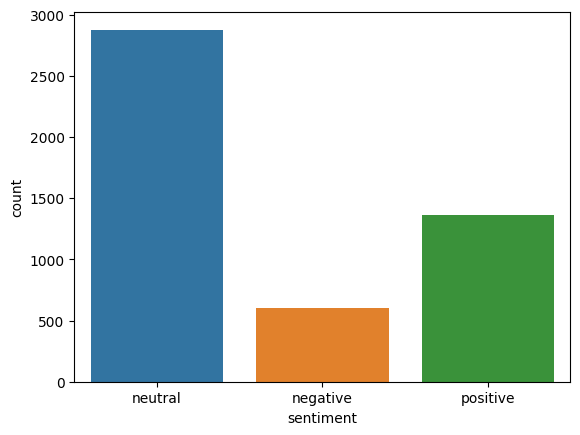

In [14]:
sns.countplot(x = 'sentiment', data = df)


In [136]:
df['text'].isnull().values.any()


False

Drop the row that has empty text.

In [145]:
df.iloc[2983]

sentiment    neutral
text                
Name: 2983, dtype: object

In [144]:
df['text'][2983]

'  '

In [150]:
df = df.drop(df.index[2983])

Downloads a set of commonly used words in natural language processing from the Natural Language Toolkit (nltk) library.

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Standardizes text data by removing non-alphabetic characters, converting to lowercase, splitting into words, removing stop words, and concatenating the remaining words back together.

In [21]:
def clean_text(text):
 
    text = re.sub('[^a-zA-Z]', ' ', text)  

    text = text.lower()  

    text = text.split(' ')  
    
    text = [w for w in text if not w in set(stopwords.words('english'))] 

    text = ' '.join(text)    
            
    return text



df['text'] = df['text'].apply(lambda x : clean_text(x))
df.head()

,sentiment,text
0,neutral,according gran company plans move production...
1,neutral,technopolis plans develop stages area less ...
2,negative,international electronic industry company elco...
3,positive,new production plant company would increase ca...
4,positive,according company updated strategy years ...


# GliVe embedding

Downloads the GloVe word embedding file.

In [29]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2023-04-23 17:08:28--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-04-23 17:08:28--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-04-23 17:08:29--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

Unzip it.

In [30]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [31]:
!ls
!pwd

drive		   glove.6B.200d.txt  glove.6B.50d.txt	sample_data
glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip
/content


Index the vectors.

In [32]:
print('Indexing word vectors.')

embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Indexing word vectors.
Found 400000 word vectors.


Save the indexed vectors to google drive for re-use.

In [35]:
import pickle
pickle.dump({'embeddings_index' : embeddings_index } , open('/content/drive/MyDrive/Colab Notebooks/glove_embedding', 'wb'))

Example of indexing.

In [38]:
len(embeddings_index['iran'])

100

Downloads the 'punkt' data package, which contains pre-trained models for tokenizing text.

In [43]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Tokenize the texts in dataframe.

In [182]:
sentences = []
 
for index, sent in df.iterrows():
    x = [i.lower() for  i in word_tokenize(sent['text']) if i.isalpha()]
    sentences.append(x)


Computes the GloVe embedding for each word in a given sentence and return mean of the GloVe embeeddings.

In [152]:
def embedding_glove(sentence):
  vectors = []
  for word in sentence:
    try:
      word_vec = embeddings_index[word]
      vectors.append(word_vec)
    except:
      continue
  return np.mean(vectors,axis = 0)


Compute GloVe embedding for each text.

In [163]:
embedded_titles = []

for sent in sentences:
    vec = embedding_glove(sent)
    embedded_titles.append(vec)

In [159]:
embedded_titles[0]

array([ 1.04105577e-01,  7.79160038e-02,  2.84197986e-01,  1.00057900e-01,
        7.50532150e-02, -6.61554635e-01, -5.33127971e-02,  2.83826411e-01,
        2.08995506e-01,  2.30922654e-01,  4.83705997e-02, -1.23591021e-01,
        1.58971488e-01, -2.34510496e-01, -2.93724090e-01, -3.38570476e-01,
        2.58858979e-01,  1.75151043e-02, -6.85613602e-02,  6.64329082e-02,
        1.97457820e-01, -8.55839103e-02,  1.88042000e-01,  4.79728609e-01,
       -1.75953239e-01, -1.12495996e-01, -2.05668099e-02, -6.64758086e-02,
        7.14107999e-04,  6.80161044e-02, -1.17748007e-01,  5.93822122e-01,
       -2.02576995e-01, -2.36516163e-01, -7.55572692e-02,  4.24095690e-01,
        4.57141966e-01, -9.48397517e-02, -1.65833890e-01, -2.77273029e-01,
        2.40880065e-02, -2.37254813e-01, -9.33488980e-02,  2.10398324e-02,
        2.37222284e-01, -5.39563075e-02,  4.49927039e-02, -2.93550998e-01,
        9.12819952e-02, -5.32307267e-01,  7.99390003e-02,  2.00043038e-01,
        5.31901941e-02,  

In [164]:
X = np.array(embedded_titles)

In [165]:
X.shape

(4845, 100)

In [169]:
y= df['sentiment']
y

0        neutral
1        neutral
2       negative
3       positive
4       positive
          ...   
4841    negative
4842     neutral
4843    negative
4844    negative
4845    negative
Name: sentiment, Length: 4845, dtype: object

# Preprocessing and Train/Test Spliting

Encode categorical labels with integer values that can be used as input for logistic regression.

In [173]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_encoded = np.reshape(y_encoded, (-1, 1))

In [187]:
y[:5]

0     neutral
1     neutral
2    negative
3    positive
4    positive
Name: sentiment, dtype: object

In [186]:
y_encoded[:5]

array([[1],
       [1],
       [0],
       [2],
       [2]])

Split data into training and testing sets with 90/10 prportion using scikit-learn's train_test_split function.

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, shuffle=True, test_size= 0.1, random_state= 60)

Train a Logistic Regression classifier on the GloVe vectors of the training set.

In [175]:
logReg = LogisticRegression()
logReg

LogisticRegression()

In [177]:
logReg.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Making Predictions on Test Data.

In [178]:
y_pred = logReg.predict(X_test)

Evaluating the Performance of a Logistic Regression Classifier on Test Data.

In [181]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.46      0.50        63
           1       0.75      0.85      0.80       286
           2       0.63      0.49      0.55       136

    accuracy                           0.70       485
   macro avg       0.64      0.60      0.62       485
weighted avg       0.69      0.70      0.69       485



Plot a confusion matrix.

In [188]:
confMat = confusion_matrix(y_pred, y_test)
print("Confusion Matrix: \n", confMat)

Confusion Matrix: 
 [[ 29  14   9]
 [ 22 244  60]
 [ 12  28  67]]


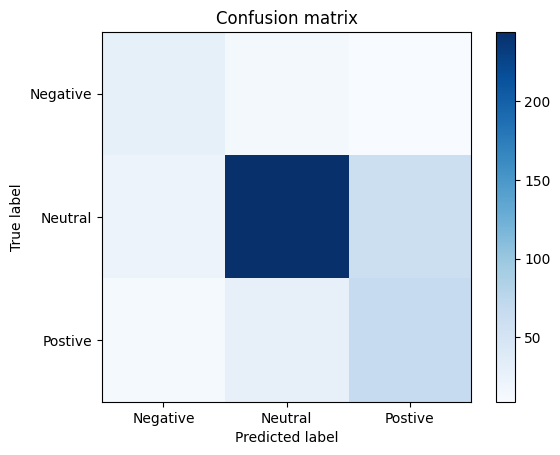

In [192]:

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
im = ax.imshow(confMat, interpolation='nearest', cmap=plt.cm.Blues)
ax.set(xticks=np.arange(confMat.shape[1]),
       yticks=np.arange(confMat.shape[0]),
       xticklabels=['Negative', 'Neutral', 'Postive'],
       yticklabels=['Negative', 'Neutral', 'Postive'],
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')
# Add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)

plt.show()